In [2]:
import xarray as xr
import pandas as pd
import numpy as np


# Dataframe

In [3]:
dailydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\daily_data.nc')
df=dailydata.to_dataframe()

df.columns = df.columns.str.lower()
df.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
df = df[df['station'] == 'Wazirpur, Delhi - DPCC'] 
#df=df[df['date']=='2022-08-23']
print(df)


                      station       date   latitude  longitude        pm25  \
index                                                                        
13376  Wazirpur, Delhi - DPCC 2022-01-01  28.699793  77.165453  287.269231   
13377  Wazirpur, Delhi - DPCC 2022-01-02  28.699793  77.165453  307.791667   
13378  Wazirpur, Delhi - DPCC 2022-01-03  28.699793  77.165453  310.250000   
13379  Wazirpur, Delhi - DPCC 2022-01-04  28.699793  77.165453  301.187500   
13380  Wazirpur, Delhi - DPCC 2022-01-05  28.699793  77.165453  317.885417   
...                       ...        ...        ...        ...         ...   
13736  Wazirpur, Delhi - DPCC 2022-12-27  28.699793  77.165453  232.427083   
13737  Wazirpur, Delhi - DPCC 2022-12-28  28.699793  77.165453  182.781250   
13738  Wazirpur, Delhi - DPCC 2022-12-29  28.699793  77.165453  256.239583   
13739  Wazirpur, Delhi - DPCC 2022-12-30  28.699793  77.165453  325.378333   
13740  Wazirpur, Delhi - DPCC 2022-12-31  28.699793  77.165453  

# Enhancement

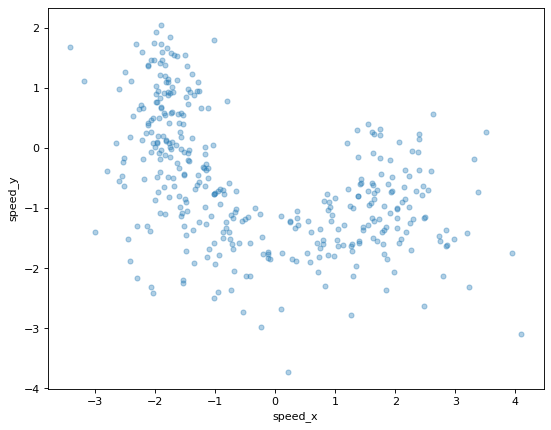

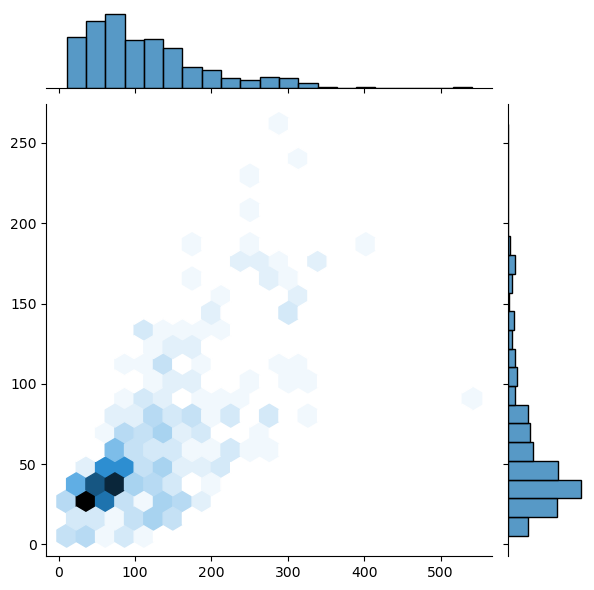

In [4]:
def scatterPlot(df, x, y, **kwargs):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from math import pi

   # df1 = pd.DataFrame({"speed": ws, "direction": wd})
    df["speed_x"] = df['ws'] * np.sin(df['wd'] * pi / 180.0)
    df["speed_y"] = df['ws'] * np.cos(df['wd'] * pi / 180.0)
    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    ax.set_aspect("equal")
    _ = df.plot(kind="scatter", x="speed_x", y="speed_y", alpha=0.35, ax=ax)
    plt.show()
    
    sns.jointplot(x=df[x].values, y=df[y].values, kind="hex")
    plt.show()
    
scatterPlot(df,'pm25','nox')